### Spectral Clustering using Eigen Vectors of Laplacian

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/Social Analysis/Spectral-Clustering

/content/drive/MyDrive/Colab Notebooks/Social Analysis/Spectral-Clustering


In [24]:
!pip install python-louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 5.2 MB/s 


In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from community  import community_louvain
import copy

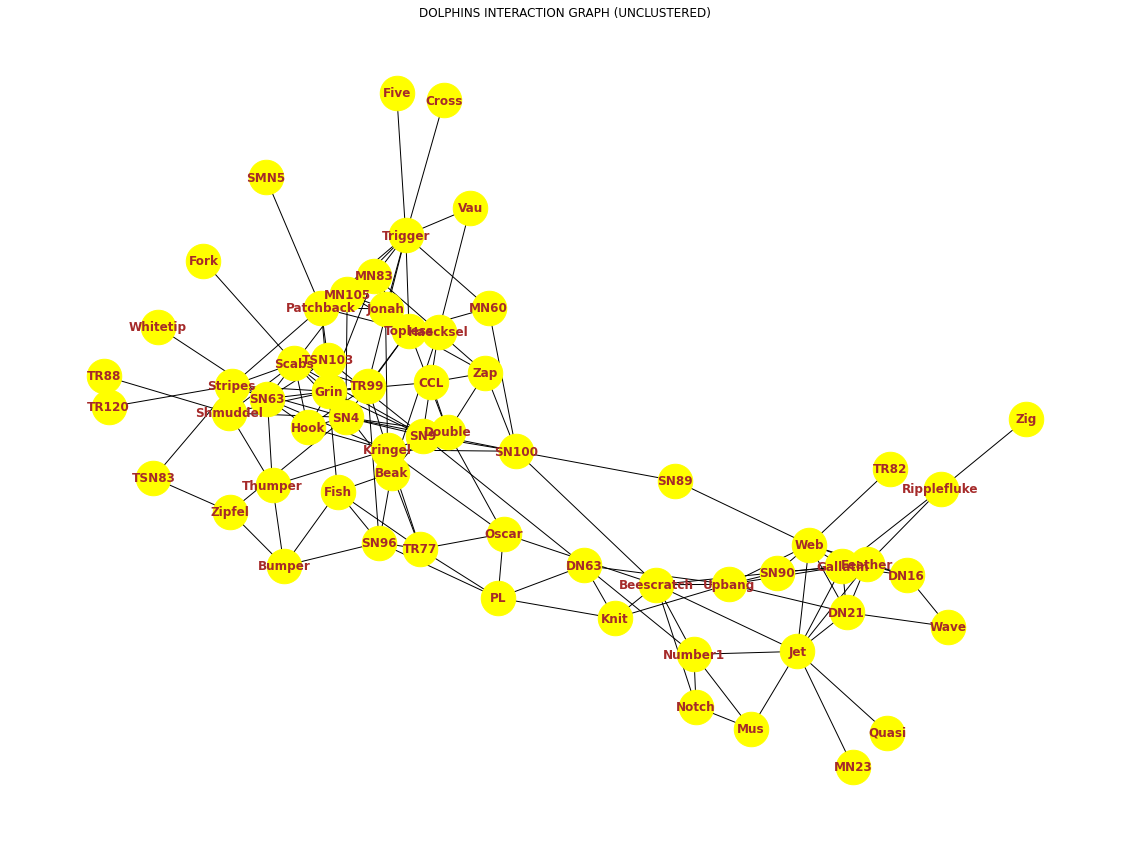

In [6]:
plt.figure(1,figsize=(20,15))
plt.title("DOLPHINS INTERACTION GRAPH (UNCLUSTERED)")
dolphin_graph = nx.Graph()
data = nx.read_gml("./data/dolphins.gml")
nx.draw(data,with_labels=True,font_weight='bold',font_color='brown',node_color='yellow',node_size=1190)
plt.show()

In [7]:
#preserving labels for future use
labels = {}
labels_list = list(data.nodes())
for i in range(len(list(data.nodes()))):
    labels[i] = labels_list[i]

#### No of eigen values near 0 ~ no of communities

No of eigen values near 0 = 2 => no of communities = 2 => input to k means n_clusters = 2


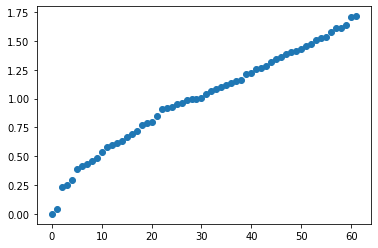

In [8]:
#extracting numpy adjacency matrix out of graph
dolphin_matrix = nx.to_numpy_matrix(data)

#making degree matrix
dolphin_degree = np.zeros([62,62])
degrees = dolphin_matrix.sum(axis=1)
for i in range(len(dolphin_matrix)):
    for j in range(len(dolphin_matrix)):
        if i==j:
            dolphin_degree[i][j] = degrees[i]


#making normalized dolphin laplacian matrix

identity_matrix = np.identity(62)
for i in range(len(dolphin_degree)):
    dolphin_degree[i][i] = 1/np.sqrt(dolphin_degree[i][i])

temp = np.matmul(dolphin_degree,dolphin_matrix)
norm_laplacian = identity_matrix - np.matmul(temp,dolphin_degree)

#------EIGEN VALUES, EIGEN VECTORS OF NORMALIZED LAPLACIAN & CALCULATION OF FIEDLER VECTOR
eigenvals, eiganvecs = np.linalg.eig(norm_laplacian)
# sort these based on the eigenvalues
#print(eigenvals)
#print(eiganvecs)
eigenvecs = eiganvecs[:,np.argsort(eigenvals)]
eigenvals = eigenvals[np.argsort(eigenvals)]
x = np.arange(0,62)
#we see two eigen values near 0 hence possible no of clusters = 2 which will be input to k-means => k=2
print("No of eigen values near 0 = 2 => no of communities = 2 => input to k means n_clusters = 2")
plt.scatter(x,eigenvals) 
plt.show()
#print(eigenvals)



In [9]:
#fiedler-vector
fiedler_vector = np.array(eigenvecs[1])[0]
print("Fiedler Vector = "+ str(fiedler_vector))


# kmeans on fiedler vector
kmeans = KMeans(n_clusters=2)
kmeans.fit(eigenvecs[:,1:2])
colors = kmeans.labels_
colors = ['yellow' if i==1 else 'pink' for i in colors]

Fiedler Vector = [-1.58610317e-01  1.60365437e-01  2.07013747e-01  1.15072318e-01
 -1.32585310e-01 -4.56926586e-02  1.60506162e-02 -8.52114767e-02
  1.61357555e-02 -1.24969278e-01 -8.31034226e-02  2.46961592e-02
  1.03201691e-01  1.33713565e-02  3.33281580e-02 -3.73062801e-02
 -3.42424000e-02 -3.10871934e-02 -3.30141622e-01  3.18616609e-02
 -1.45466911e-01  5.65229327e-02  2.85262459e-01  1.20231532e-01
 -2.04783857e-01  1.22942621e-01  3.20369437e-01  1.10489827e-01
  2.03040717e-15  2.56224243e-15 -4.66979729e-02  7.29826054e-02
  1.07780672e-01  1.24234383e-01  8.48173391e-02 -2.84865949e-02
  2.42628217e-02  1.96138142e-01  8.22182186e-02  1.14654442e-01
  9.02190144e-02 -4.13778906e-03 -2.13626510e-02  1.15298766e-01
  1.46624959e-01  9.48816279e-02 -1.14244740e-01  9.72712694e-03
 -3.58115009e-02  7.92781675e-02 -2.40814257e-02 -5.81649717e-02
  2.88260836e-01  2.92553332e-02  2.02187415e-01 -4.61649954e-02
 -6.98815440e-02  2.28942827e-01  1.86297310e-01 -9.48580929e-02
 -1.2949

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


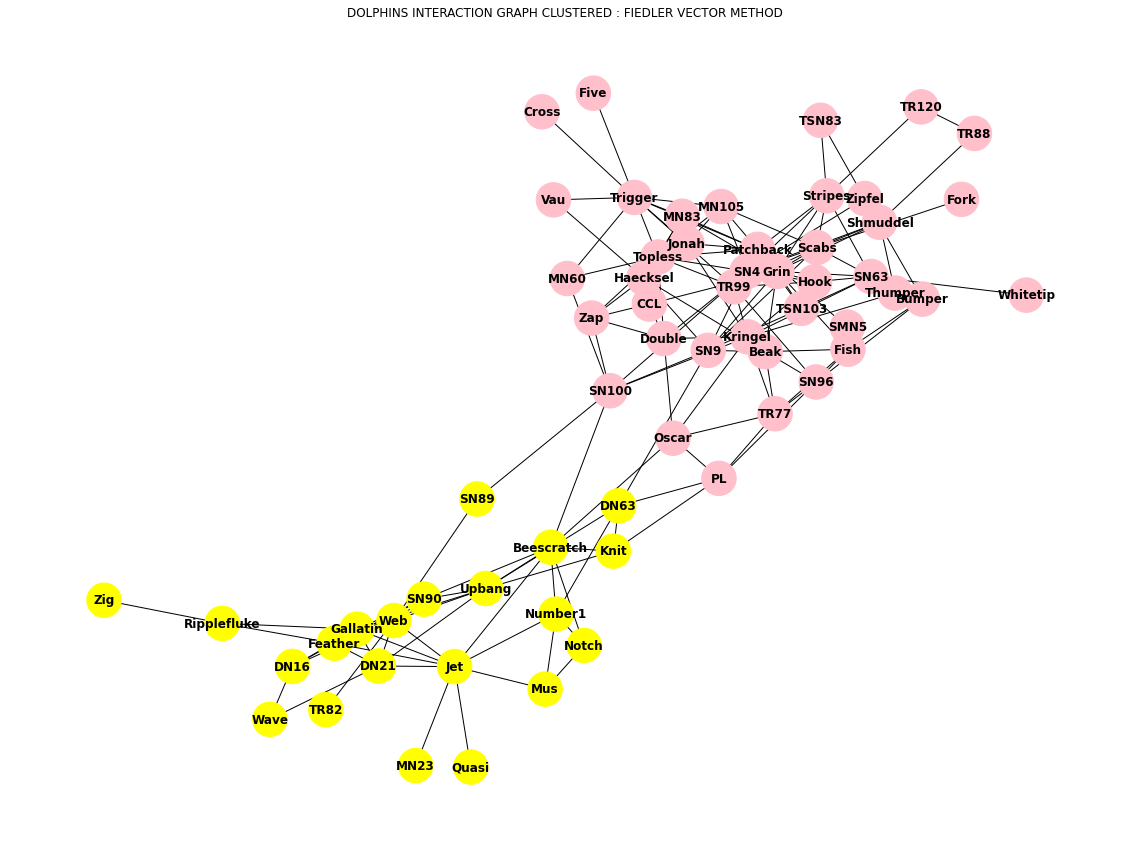

In [10]:
#plotting clustered communities
g = nx.from_numpy_matrix(dolphin_matrix)
plt.figure(1,figsize=(20,15))
plt.title("DOLPHINS INTERACTION GRAPH CLUSTERED : FIEDLER VECTOR METHOD")
dolphin_graph_r = nx.Graph()
nx.draw(g,with_labels=True,font_weight='bold',font_color='black',node_color=colors,labels=labels,node_size=1190)


In [11]:
print("Community 1 = "+str(colors.count('yellow'))+" dolphins \nCommunity 2 = "+str(colors.count('pink'))+" dolphins")

Community 1 = 21 dolphins 
Community 2 = 41 dolphins


### Spectral Clustering using Louvain Method

In [14]:
import igraph as ig

In [30]:
def list_to_dict(l):
    p = {}
    for i in range(len(l)):
        for j in range(len(l[i])):
            p[l[i][j][0]]=l[i][j][1]
    return p

def louvain_inbuilt():
    G = data
    cluster = community_louvain.best_partition(G,randomize=True)
    n_cluster = max(cluster.values()) + 1

    communities = []
    for i in range(n_cluster):
            communities_temp = [list(item) for item in cluster.items() if item[1] == i]
            communities.append(communities_temp)
    return communities,cluster
        
def greedy_modularity(a,b,l,cm1,cm2,G):
    k=0
    while(k<=len(l)):
        
        for i in range(k,len(l)):
            for j in range(len(l[i])):
                    l[i][j][1]=a
        for i in range(k):
            for j in range(len(l[i])):
                    l[i][j][1]=b
        if cm1 not in l:
            l.append(cm1)
        if cm2 not in l:
            l.append(cm2)
        p = list_to_dict(l)
        global_modularity.append([community_louvain.modularity(p,G),p])
        
        k=k+1
            
def greedy_driver(communities,flag):
    size_of_clusters = [len(i) for i in communities]
    
    cluster_max_1_index = size_of_clusters.index(max(size_of_clusters))
    size_of_clusters[cluster_max_1_index] = -1
    cluster_max_1 = communities[cluster_max_1_index]
    cluster_max_2_index = size_of_clusters.index(max(size_of_clusters))
    cluster_max_2 = communities[cluster_max_2_index]
    communities.remove(cluster_max_1)
    communities.remove(cluster_max_2)
    if flag==1:
        greedy_modularity(cluster_max_1[0][1],cluster_max_2[0][1],communities,cluster_max_1,cluster_max_2,data)
    else:
        greedy_modularity(cluster_max_2[0][1],cluster_max_1[0][1],communities,cluster_max_2,cluster_max_1,data)    

In [33]:
global_modularity = []
communities,louvain_partition = louvain_inbuilt()
temp = copy.deepcopy(communities)
greedy_driver(communities,1)
greedy_driver(temp,2)
mod_list=[]
for i in range(len(global_modularity)):
    mod_list.append(global_modularity[i][0])
max_modularity_cluster_index = mod_list.index(max(mod_list))

In [35]:
partition = global_modularity[max_modularity_cluster_index][1]

In [38]:
colors=[]
c1 = partition['Beak']
for i in data.nodes():#or G=data add it in first line of this module

    if partition[i]==c1:
        colors.append('yellow')
    else:
        colors.append('pink')
count = [1 if i =='yellow' else 0 for i in colors]
print("Community 1 = "+str(sum(count))+" Community 2 = "+ str(62-sum(count)))

Community 1 = 43 Community 2 = 19


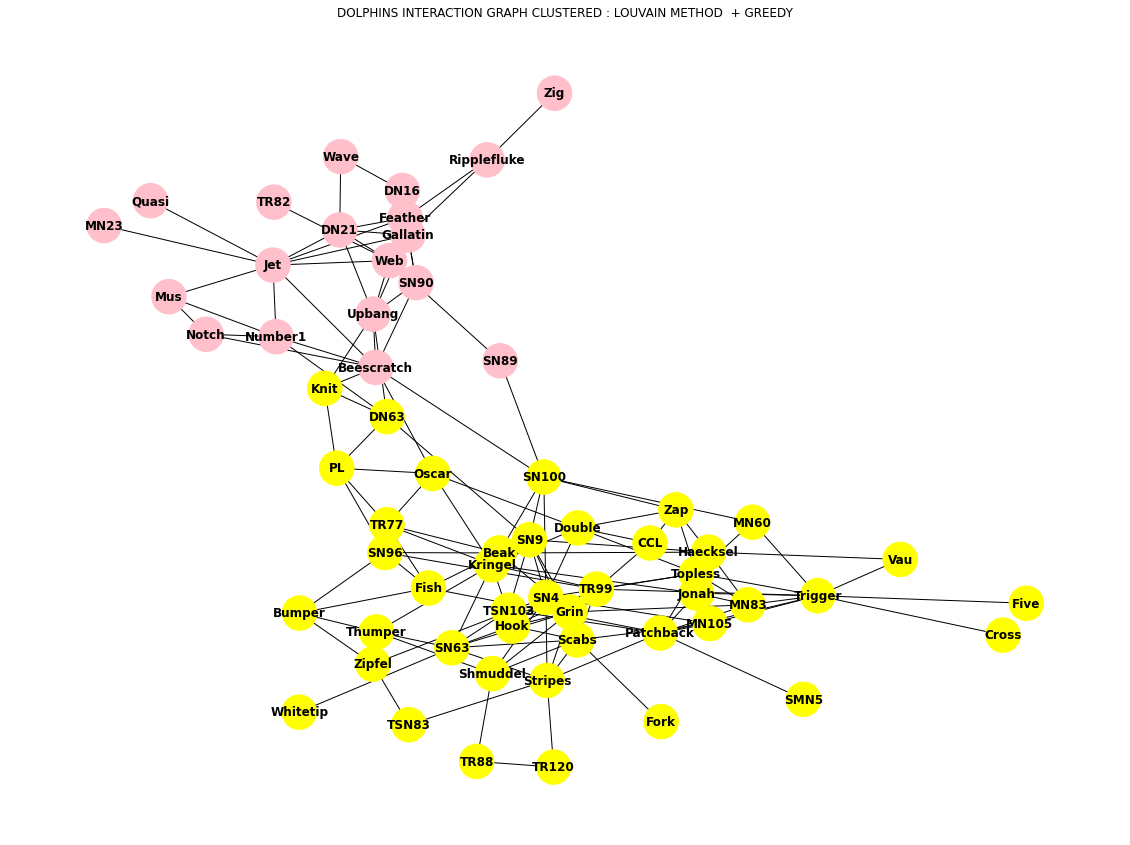

In [39]:
plt.figure(1,figsize=(20,15))
plt.title("DOLPHINS INTERACTION GRAPH CLUSTERED : LOUVAIN METHOD  + GREEDY")
dolphin_graph_r = nx.Graph()
nx.draw(g,with_labels=True,font_weight='bold',font_color='black',node_color=colors,labels=labels,node_size=1190)


###  Solving Two circles problem (KMeans fails on this)

In [40]:
circles_data = pd.read_csv("./data/11_twoCirclesData.csv")

In [91]:
circles_adj_matrix = np.zeros([400,400])
sigma = 0.06   #hit and trial 
for i in range(400):
    for j in range(400):
    
        norm = np.square(circles_data['x'][i] - circles_data['x'][j]) + np.square(circles_data['y'][i] - circles_data['y'][j])
        circles_adj_matrix[i][j] = np.exp(-1*(norm)/(sigma**2))


In [45]:
import sys

In [92]:
diagonal = np.sum(circles_adj_matrix,axis=1)
#diagonal = [399.0 for i in range(400)]
circle_deg_matrix = np.diag(diagonal)
laplacian_circle = circle_deg_matrix - circles_adj_matrix

In [113]:
from scipy import linalg

In [116]:
import scipy.sparse.linalg
import sklearn.preprocessing
_,eigenvecs = scipy.sparse.linalg.eigs(laplacian_circle , 3, which='LM')# which='SM'
# discard the first trivial eigenvector
eigenvecs = eigenvecs[:, 1:].real.astype(np.float32)
# normalize each row by its L2 norm
eigenvecs_c = sklearn.preprocessing.normalize(eigenvecs)

In [98]:
eigenvecs_c.shape

(400, 2)

In [107]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(eigenvecs_c[:,1:3])
colors_c = kmeans.labels_
colors_c = ['red' if i==1 else 'blue' for i in colors_c]

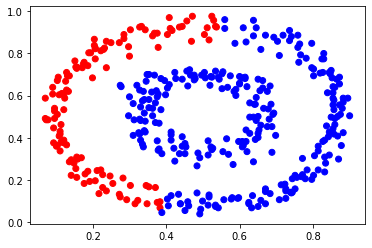

In [110]:
plt.scatter(circles_data['x'],circles_data['y'],c=colors_c)